In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [2]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

X=dataset.iloc[:,3:-1]
Y=dataset.iloc[:,-1]
X.head()

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

X=pd.concat([X,geography,gender],axis=1)
X.drop(["Geography","Gender"],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [3]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
model=Sequential()

model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11))
model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

history=model.fit(x_train,y_train,validation_split=0.3,epochs=100)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6431 - loss: 0.6226 - val_accuracy: 0.7895 - val_loss: 0.5027
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5066 - val_accuracy: 0.7943 - val_loss: 0.4773
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7901 - loss: 0.4802 - val_accuracy: 0.7943 - val_loss: 0.4640
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.4719 - val_accuracy: 0.7962 - val_loss: 0.4567
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4631 - val_accuracy: 0.7962 - val_loss: 0.4519
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 0.4572 - val_accuracy: 0.7976 - val_loss: 0.4476
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4503 - val_accuracy: 0.7995 - val_loss: 0.4439
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.4402 - val_accu

In [12]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)


cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f"classification report\n{classification_report(y_test,y_pred)}")
print(f"accuracy_score {accuracy_score(y_test,y_pred)}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[2318   98]
 [ 313  271]]
classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

accuracy_score 0.863


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


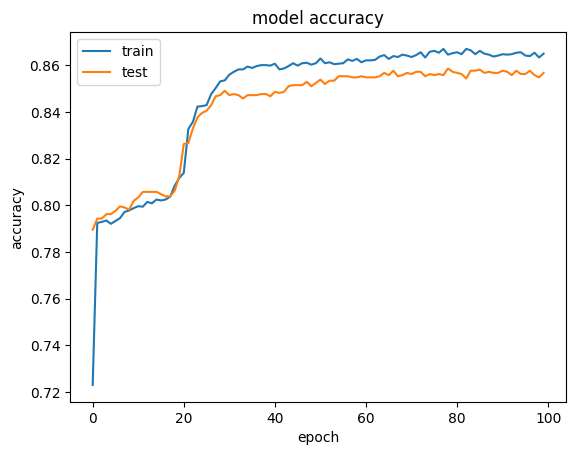

In [16]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()